Importing libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model



File importing


Data preprocessing

In [ ]:

df = pd.read_csv('longimp.csv')
df1 = pd.read_csv('latimp.csv')
df.head(10)
df1.isnull().sum().sort_values(ascending=False)
df_no_missing = df1.dropna(axis=0)
print(df_no_missing.head(5))
df.isnull().sum().sort_values(ascending=False)
df_no_missing = df.dropna(axis=0)
print(df_no_missing.head(5))


   delta_lati  delta_temp  delta_windspeed  eastwest_CS  northsouth_CS  \
0       0.210      -1.035            1.648      -54.195        -18.371   
1       0.011       0.028           -0.915       13.631         17.645   
2       0.069       0.091           -0.896       17.559       -133.711   
3       0.178      -0.055            1.532      -31.886         10.146   
4       0.016      -0.025           -0.686       21.395        -13.062   

   delta_u10  delta_v10  
0     -1.446      0.148  
1      0.182      0.087  
2      1.612     -2.286  
3     -1.403      0.221  
4      0.723     -0.230  
   delta_longi  delta_temp  delta_windspeed  eastwest_CS  northsouth_CS  \
0        0.113      -0.035            1.648      -54.195        -18.371   
1        0.014       0.028           -0.915       13.631         17.645   
2        0.075       0.091           -0.896       17.559       -133.711   
3        0.152      -0.055            1.532      -31.886         10.146   
4        0.014      -0.0

correlation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   delta_longi      1257 non-null   float64
 1   delta_temp       1257 non-null   float64
 2   delta_windspeed  1257 non-null   float64
 3   eastwest_CS      1257 non-null   float64
 4   northsouth_CS    1257 non-null   float64
 5   delta_u10        1257 non-null   float64
 6   delta_v10        1257 non-null   float64
dtypes: float64(7)
memory usage: 68.9 KB


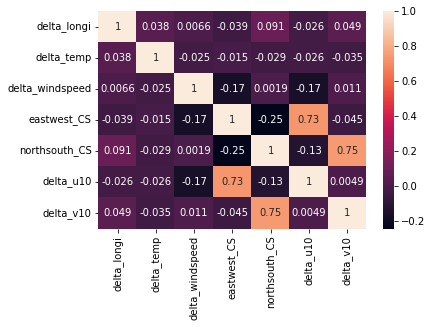

In [ ]:
df.info()
df.corr()
sns.heatmap(df.corr(),annot=True)

Linear regression Implementation


In [ ]:

#from sklearn import metrics

from sklearn import metrics
X = df[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df[['delta_longi']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = regr.predict(X_test)
for i in Y_pred:
  #print(i)
  pass
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Root Mean Squared Error: 0.0835678594322567
Intercept: 
 [-0.05362738]
Coefficients: 
 [[ 5.40653225e-02  1.99105505e-04 -2.25033790e-06  1.85492919e-04
  -2.69867358e-03 -3.42337324e-03]]
Root Mean Squared Error: 0.0835678594322567
Intercept: 
 [-0.05362738]
Coefficients: 
 [[ 5.40653225e-02  1.99105505e-04 -2.25033790e-06  1.85492919e-04
  -2.69867358e-03 -3.42337324e-03]]


linear regression latitude

In [ ]:

#from sklearn import metrics

from sklearn import metrics
X = df1[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df1[['delta_lati']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = regr.predict(X_test)
for i in Y_pred:
  #print(i)
  pass
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# X = sm.add_constant(X) 
 
# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 

# print_model = model.summary()

 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Root Mean Squared Error: 0.08360358527673802
Intercept: 
 [-0.05299049]
Coefficients: 
 [[ 1.39574920e-05  9.71872970e-06 -2.67153592e-07  1.77340394e-04
  -3.69582464e-03 -3.47724087e-03]]
Root Mean Squared Error: 0.08360358527673802
Intercept: 
 [-0.05299049]
Coefficients: 
 [[ 1.39574920e-05  9.71872970e-06 -2.67153592e-07  1.77340394e-04
  -3.69582464e-03 -3.47724087e-03]]


Bayesian regression longitude prediction

In [ ]:

from sklearn import metrics
X = df[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df[['delta_longi']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# with sklearn
regr = linear_model.BayesianRidge()
regr.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = regr.predict(X_test)
for i in Y_pred:
  #print(i)
  pass
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# X = sm.add_constant(X) 
 
# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 

# print_model = model.summary()
# print(print_model)

Root Mean Squared Error: 0.08347955588742954
Intercept: 
 -0.053245656265764746
Coefficients: 
 [ 3.86618006e-05 -2.71720817e-05 -4.63254725e-05  1.23557287e-04
 -1.07558901e-04 -1.79606208e-04]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bayesian regression latitude prediction

In [ ]:

#from sklearn import metrics

from sklearn import metrics
X = df1[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df1[['delta_lati']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# with sklearn
regr = linear_model.BayesianRidge()
regr.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = regr.predict(X_test)
for i in Y_pred:
  #print(i)
  pass
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Root Mean Squared Error: 0.08351713930745139
Intercept: 
 -0.05297653580282429
Coefficients: 
 [ 1.35987881e-05 -6.52664158e-06 -5.12931962e-05  1.18170499e-04
 -9.58984418e-05 -1.24435690e-04]
Root Mean Squared Error: 0.08351713930745139
Intercept: 
 -0.05297653580282429
Coefficients: 
 [ 1.35987881e-05 -6.52664158e-06 -5.12931962e-05  1.18170499e-04
 -9.58984418e-05 -1.24435690e-04]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svm


In [ ]:
from sklearn import svm

regr = svm.SVR()



from sklearn import metrics
X = df[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df[['delta_longi']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# with sklearn
regr = svm.SVR()
regr.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = regr.predict(X_test)
for i in Y_pred:
  #print(i)
  pass
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))




from sklearn import metrics
X = df1[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df1[['delta_lati']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# with sklearn

regr = svm.SVR()
regr.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = regr.predict(X_test)
for i in Y_pred:
  #print(i)
  pass
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



Root Mean Squared Error: 0.09155896207976195
Root Mean Squared Error: 0.09156810737473686


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


decision tree

In [ ]:
from sklearn import tree


from sklearn import metrics
X = df[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df[['delta_longi']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# with sklearn
regr = tree.DecisionTreeRegressor()
regr.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = regr.predict(X_test)
for i in Y_pred:
  #print(i)
  pass
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))





from sklearn import metrics
X = df1[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df1[['delta_lati']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# with sklearn
regr = tree.DecisionTreeRegressor()
regr.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = regr.predict(X_test)
for i in Y_pred:
  # print(i)
  pass
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



Root Mean Squared Error: 0.11271911993978662
Root Mean Squared Error: 0.10909815135849585


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# X = df[['northsouth_CS']] 

# Y = df['delta_longi']
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# # with sklearn

# neigh.fit(X_train, Y_train)

# # Predicting the Test set results
# Y_pred = neigh.predict(X_test)
# for i in Y_pred:
#   #print(i)
#   pass
 
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))





# from sklearn import metrics
# X = df1[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

# Y = df1[['delta_lati']]
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

# # with sklearn
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X_train, Y_train)
# # Predicting the Test set results
# Y_pred = neigh.predict(X_test)
# for i in Y_pred:
#   #print(i)
#   pass
 
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# neigh.fit(X, y)

Ordinary least squares

In [ ]:
X = df[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df[['delta_longi']]
X = sm.add_constant(X) 

 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            delta_longi   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.299
Date:                Fri, 26 Aug 2022   Prob (F-statistic):             0.0327
Time:                        08:48:21   Log-Likelihood:                 1367.9
No. Observations:                1257   AIC:                            -2722.
Df Residuals:                    1250   BIC:                            -2686.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0532      0.002    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = df1[['delta_temp','delta_windspeed','eastwest_CS','northsouth_CS','delta_u10','delta_v10']] 

Y = df1[['delta_lati']]
X = sm.add_constant(X) 

 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             delta_lati   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.399
Date:                Fri, 26 Aug 2022   Prob (F-statistic):             0.0261
Time:                        08:48:21   Log-Likelihood:                 1364.4
No. Observations:                1257   AIC:                            -2715.
Df Residuals:                    1250   BIC:                            -2679.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0527      0.002    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
